# 2 Modélisation – Evaluation – Arbre de décision

##### 1 Modifiez le dossier de travail par défaut (os.chdir). Notez bien le chemin du dossier parce que nous en aurons l’usage plus loin.

In [1]:
import os
print(os.getcwd())

c:\Users\cpecnik\Documents\COURSES\ATELIERS\PYTHON\CHAP4


##### 2 Chargez le classeur Excel « working_conditions.xlsx » (pandas.read_excel). Affichez les informations de la structure data frame (info). Combien y a-t-il d’observations ? (432) De variables ? (7)

In [2]:
import pandas as pd
working_conditions = pd.read_excel("working_conditions.xlsx")

In [3]:
working_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   profdev   432 non-null    float64
 1   conflict  432 non-null    float64
 2   regulat   432 non-null    float64
 3   jobvar    432 non-null    float64
 4   workgrp   432 non-null    float64
 5   standrds  432 non-null    float64
 6   working   432 non-null    object 
dtypes: float64(6), object(1)
memory usage: 23.8+ KB


##### 3 « working » est la variable cible, les autres constituent les explicatives. Isolez les colonnes correspondantes dans des structures distinctes (y et X).

In [4]:
y = working_conditions.select_dtypes(object)
X = working_conditions.select_dtypes(float)

##### 4 Calculez les fréquences relatives des classes (value_counts). Quel est la proportion des « good », des « poor » ? (0.636..., 0.363...)

In [5]:
print(y.value_counts()/len(y.values))

working
good       0.636574
poor       0.363426
Name: count, dtype: float64


##### 5 Importez la librairie « scikit-learn », affichez le numéro de version (1.7.2 – octobre 2025).

In [6]:
import sklearn as sk
print(sk.__version__)

1.7.2


##### 6 Partitionnez les données en échantillons d’apprentissage et de test. Nous souhaitons : Utiliser 200 observations en test (test_size), Effectuer un tirage stratifié pour respecter les proportions des classes (stratify), Nous fixons (random_state = 0) pour que nous ayons tous les mêmes résultats.

In [7]:
from sklearn import model_selection
X_app, X_test, y_app, y_test = model_selection.train_test_split(X, y, test_size=200,stratify=y, random_state=0)

##### 7 Vérifiez les proportions des classes dans les 2 sous-échantillons. Commentaires ?

In [8]:
print(y_app.value_counts())
print(y_test.value_counts())

print(y_app.value_counts() / y.value_counts())
print(y_test.value_counts() / y.value_counts())

working
good       148
poor        84
Name: count, dtype: int64
working
good       127
poor        73
Name: count, dtype: int64
working
good       0.538182
poor       0.535032
Name: count, dtype: float64
working
good       0.461818
poor       0.464968
Name: count, dtype: float64


##### 8 Instanciez un arbre de décision (nommez-le arbre_1). Fixez (random_state = 0) pour que nous ayons des résultats identiques. Affichez la liste des paramètres de l’algorithme et leurs valeurs par défaut (get_params). Que notez-vous ? Notamment en ce qui concerne la limitation de la taille de l’arbre ?

In [9]:
arbre_1 = sk.tree.DecisionTreeClassifier(random_state=0)

print(arbre_1.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


##### 9 Lancez la modélisation (fit) et affichez l’arbre sous sa forme graphique (plot_tree). Utilisez la librairie « matplotlib » pour que seul apparaisse le dessin de l’arbre (et non pas les sorties textuelles de description de l’arbre).

In [10]:
arbre_1.fit(X_app,y_app)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


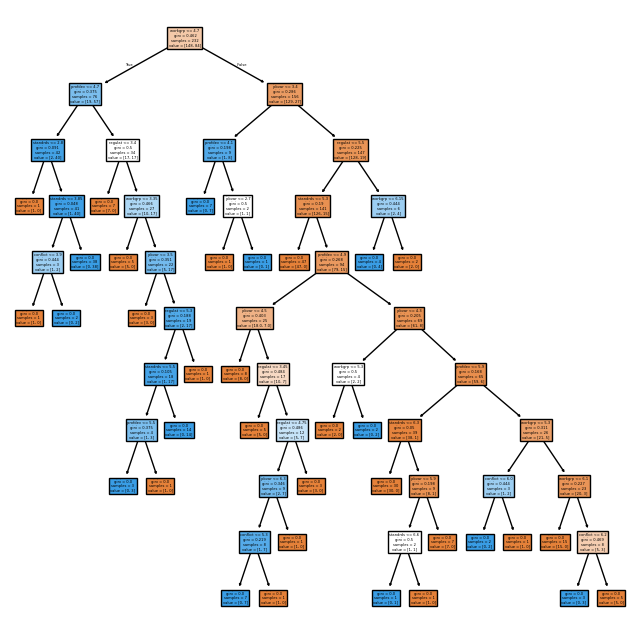

In [11]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(arbre_1, feature_names=X_app.columns,filled=True)
plt.show()

##### 10 L’arbre paraît assez conséquent. Combien y a-t-il de règles (de feuilles) dans l’arbre ? (get_n_leaves) (34)

In [12]:
print(arbre_1.get_n_leaves())

34


##### 11 Effectuez la prédiction sur l’échantillon test (predict).

In [13]:
pred = arbre_1.predict(X_test)

##### 12 Affichez le type de l’objet renvoyé par la prédiction (type). Comptabilisez alors le nombre de prédictions « good » et « poor » ? (unique avec l’option return_counts) (129, 71).

In [14]:
import numpy as np
print(type(pred))
print(np.unique(pred, return_counts=True))

<class 'numpy.ndarray'>
(array(['good', 'poor'], dtype=object), array([129,  71]))


##### 13 Construisez et affichez la matrice de confusion (metrics.confusion_matrix).

In [15]:
from sklearn import metrics
mat_conf = metrics.confusion_matrix(y_test, pred)
print(mat_conf)

[[124   3]
 [  5  68]]


##### 14 (Par coquetterie) Affichez-la sous une forme graphique (ConfusionMatrixDisplay, voir https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay).

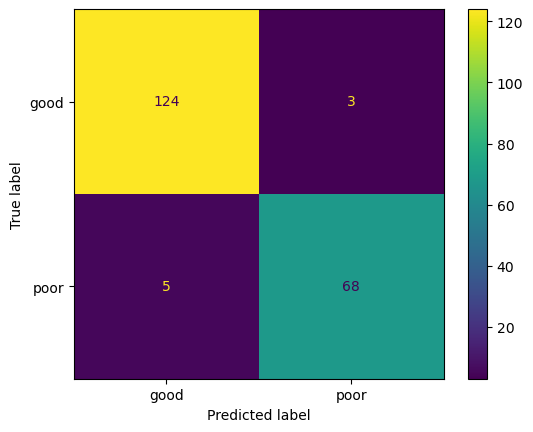

In [16]:
metrics.ConfusionMatrixDisplay(confusion_matrix=mat_conf, display_labels=arbre_1.classes_).plot()

plt.show()

##### 15 Calculez l’accuracy en test (accuracy_score), le rappel sachant que « working = good » est la modalité cible (recall_score) (TUTO, page 11), la précision (precision_score) (0.96, 0.976, 0.961).

In [17]:
acc = metrics.accuracy_score(y_test, pred)
print(acc)

se = metrics.recall_score(y_test, pred, pos_label='good')
print(se)

pre = metrics.precision_score(y_test, pred, pos_label='good')
print(pre)

0.96
0.9763779527559056
0.9612403100775194


# 3 Recensement de l'expérience

##### 16 Importez la librairie « mlflow ». Affichez le numéro de version (3.2.0 a priori).

In [18]:
import mlflow
print(mlflow.__version__)

3.2.0


##### 17 Nous allons rendre silencieux les messages du programme Git

In [19]:
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

##### 18 Nous définissons une nouvelle expérience que nous appelons « Atelier MLFLOW 1 » (mlflow.set_experiment).

In [20]:
mlflow.set_experiment("Atelier MLFLOW 1")

2025/10/10 12:59:59 INFO mlflow.tracking.fluent: Experiment with name 'Atelier MLFLOW 1' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/cpecnik/Documents/COURSES/ATELIERS/PYTHON/CHAP4/mlruns/450139722698203991', creation_time=1760093999870, experiment_id='450139722698203991', last_update_time=1760093999870, lifecycle_stage='active', name='Atelier MLFLOW 1', tags={}>

##### 20 Dans cette expérience, nous souhaitons ajouter un « run » (une session de travail), que vous appelez « my_run » (mlflow.start_run). Attribuez-lui le nom « Arbre standard » (run_name). Affichez les propriétés de l’objet (dir).

In [21]:
my_run = mlflow.start_run(run_name="Arbre standard")
print(dir(my_run))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_data', '_get_properties_helper', '_info', '_inputs', '_outputs', '_properties', 'data', 'from_dictionary', 'from_proto', 'info', 'inputs', 'outputs', 'to_dictionary', 'to_proto']


##### 21 Ajoutez un champ « metrics » de type dictionnaire (vide pour l’instant) à votre objet « my_run ». Vous reprenez dans ce dictionnaire les résultats d’accuracy, rappel et précision (cf. le document « PC – collections sous Python.pdf », page 19, pour la création ex-nihilo d’un dictionnaire). Vérifiez que le champ « metrics » appartient bien à l’objet « my_run » (dir).

In [22]:
metrics = {}
my_run.metrics = metrics

my_run.metrics = {
    "accuracy": acc,
    "recall": se,
    "precision": pre
}

print(my_run.metrics)

{'accuracy': 0.96, 'recall': 0.9763779527559056, 'precision': 0.9612403100775194}


##### 22 Il vous reste alors à recenser les informations relatives au « run » : L’objet modèle (arbre_1) et un nom (chaîne de caractère) que vous lui attribuez (mlflow.sklearn.log_model), Le nom du fichier de données utilisé (mlflow.log_artifact), Les informations de performances (mlflow.log_metrics), Les paramètres de l’algorithme (mlflow.log_params)

In [23]:
f1 = sk.metrics.f1_score(y_test, pred, average='weighted')

data_file = "working_conditions.xlsx"

with my_run:
    mlflow.sklearn.log_model(arbre_1, artifact_path="model", registered_model_name="arbre_1")

    mlflow.log_artifact(data_file)

    mlflow.log_metrics({
        "accuracy": acc,
        "f1_score": f1
    })

    mlflow.log_params(arbre_1.get_params())

2025/10/10 13:00:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/10 13:00:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'arbre_1'.
Created version '1' of model 'arbre_1'.


##### 23 Il ne nous reste plus qu’à finaliser notre expérience (mlflow.end_run)

In [24]:
mlflow.end_run()